Notebook which focuses on the randomly generated data sets and the performance comparison of algorithms on it

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:100% !important;}</style>'))

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
import torch
from itertools import product, chain

import nmf.mult
import nmf.pgrad
import nmf.nesterov

import nmf_torch.mult
import nmf_torch.pgrad
import nmf_torch.nesterov
import nmf_torch.norms

import matplotlib
import pickle

from performance.performance_eval_func import get_random_lowrank_matrix, get_time_ratio,\
                                              compare_performance, plot_errors_dict,\
                                              torch_algo_wrapper,\
                                              plot_ratios_gpu_algo, plot_ratios_cpu_gpu, plot_ratios_cpu_algo,\
                                              plot_errors_dict, errors_at_time_t_over_inner_dim
                                                

In [4]:
algo_dict_to_test = {
    "mult": nmf.mult.factorize_Fnorm,
    "pgrad": nmf.pgrad.factorize_Fnorm_subproblems,
    "nesterov": nmf.nesterov.factorize_Fnorm,

    "mult_torch": torch_algo_wrapper(nmf_torch.mult.factorize_Fnorm, 
                                     device="cuda"),
    "pgrad_torch": torch_algo_wrapper(nmf_torch.pgrad.factorize_Fnorm_subproblems, 
                                      device="cuda"),
    "nesterov_torch": torch_algo_wrapper(nmf_torch.nesterov.factorize_Fnorm, 
                                        device="cuda")
}

In [ ]:
f, ax = plt.subplots()
plot_errors_dict(errors_over_r_random, ax, log=True, x_lbl="Inner dim", title="site3")

f, ax = plt.subplots()
plot_errors_dict(errors_over_r_random, ax, log=False, x_lbl="Inner dim", title="site3")

In [4]:
shapes = [(5 * a, a) for a in [30, 100, 300, 1000, 3000]]
shapes

[(150, 30), (500, 100), (1500, 300), (5000, 1000), (15000, 3000)]

In [5]:
inner_dims_small = [sh[1] // 10 for sh in shapes]
inner_dims_small

[3, 10, 30, 100, 300]

In [6]:
inner_dims_big = [8 * sh[1] // 10 for sh in shapes]
inner_dims_big

[24, 80, 240, 800, 2400]

In [7]:
shapes_all = shapes + shapes
inner_dims = inner_dims_small + inner_dims_big

In [8]:
times = [5, 25, 200, 1200, 8000]
times = times + [t * 2 for t in times]

In [11]:
print(len(shapes_all))

10


In [9]:
errors_dict = pickle.load(open("random_data_errors_dict.pkl","rb"))

In [46]:
del errors_dict[(3, (150, 30))]

In [40]:
errors_dict = {}

In [47]:
for inner_dim, shape, t  in zip(inner_dims, shapes_all, times):
    print((inner_dim, shape))
    if (inner_dim, shape) in errors_dict.keys():
        continue
        
    V = get_random_lowrank_matrix(shape[0], inner_dim, shape[1]) + np.random.rand(*shape) * 0.1

    W_init = np.random.rand(shape[0], inner_dim)
    H_init = np.random.rand(inner_dim, shape[1])

    errors = compare_performance(V=V, inner_dim=inner_dim, time_limit=t,
                                      W_init=W_init, H_init=H_init, 
                                      algo_dict_to_test=algo_dict_to_test)
    errors_dict[(inner_dim, shape)] = errors
    pickle.dump(errors_dict,  open("random_data_errors_dict.pkl","wb"))

(3, (150, 30))
Starting mult
Starting pgrad
Starting nesterov
Starting mult_torch
Starting pgrad_torch
Starting nesterov_torch
(10, (500, 100))
(30, (1500, 300))
(100, (5000, 1000))
(300, (15000, 3000))
(24, (150, 30))
(80, (500, 100))
(240, (1500, 300))
(800, (5000, 1000))
(2400, (15000, 3000))


In [56]:
pickle.dump(errors_dict,  open("random_data_errors_dict.pkl","wb"))

In [13]:
keys = zip(inner_dims, shapes_all)
keys = sorted(keys, key=lambda k: k[0])
keys = sorted(keys, key=lambda k: k[1][0])

In [14]:
keys

[(3, (150, 30)),
 (24, (150, 30)),
 (10, (500, 100)),
 (80, (500, 100)),
 (30, (1500, 300)),
 (240, (1500, 300)),
 (100, (5000, 1000)),
 (800, (5000, 1000)),
 (300, (15000, 3000)),
 (2400, (15000, 3000))]

<IPython.core.display.Javascript object>


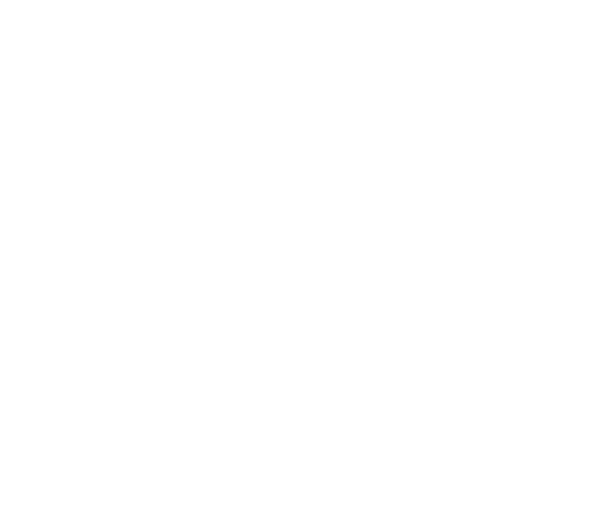

<IPython.core.display.Javascript object>


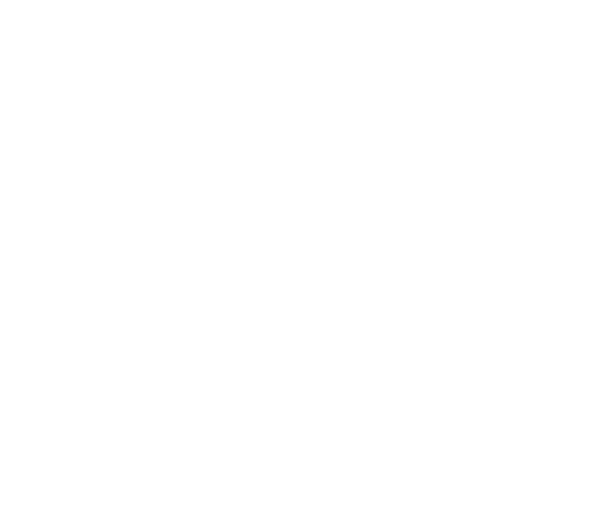

KeyError: (10, (500, 100))

In [17]:
for k in keys:
    r, shape = k
    M = np.random.rand(shape[0], r) @ np.random.rand(r, shape[1])

    errros_dict_particular_data = errors_dict[k]

    f, axes = plt.subplots(3, 2, figsize=(8, 7), dpi=100, gridspec_kw=dict(hspace=0.45, top=0.92, bottom=0.08, 
                                                                  left=0.08, right=0.99))
    f.suptitle("Comparison, time ratio for {}, {:.2f}KB, {:.2f}MB".format(k, M.nbytes / 2**10, M.nbytes / 2**20))

    plot_errors_dict(errros_dict_particular_data, axes[0, 0], log=True, title="Objective function", x_lbl="time [s]")

    plot_ratios_cpu_gpu(errros_dict_particular_data, axes[0, 1])
    plot_ratios_cpu_algo(errros_dict_particular_data, axes[1:, 0], selected_algs=["mult", "pgrad", "nesterov"])
    plot_ratios_gpu_algo(errros_dict_particular_data, axes[1:, 1],
                         selected_algs=["mult_torch", "pgrad_torch", "nesterov_torch"])

In [10]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

In [11]:
figsize = (9, 10)

gridspec_kw = dict(wspace=0.4, hspace=0.9,
                    top=0.85,
                    bottom=0.1,
                    left=0.1, right=0.95)

<IPython.core.display.Javascript object>


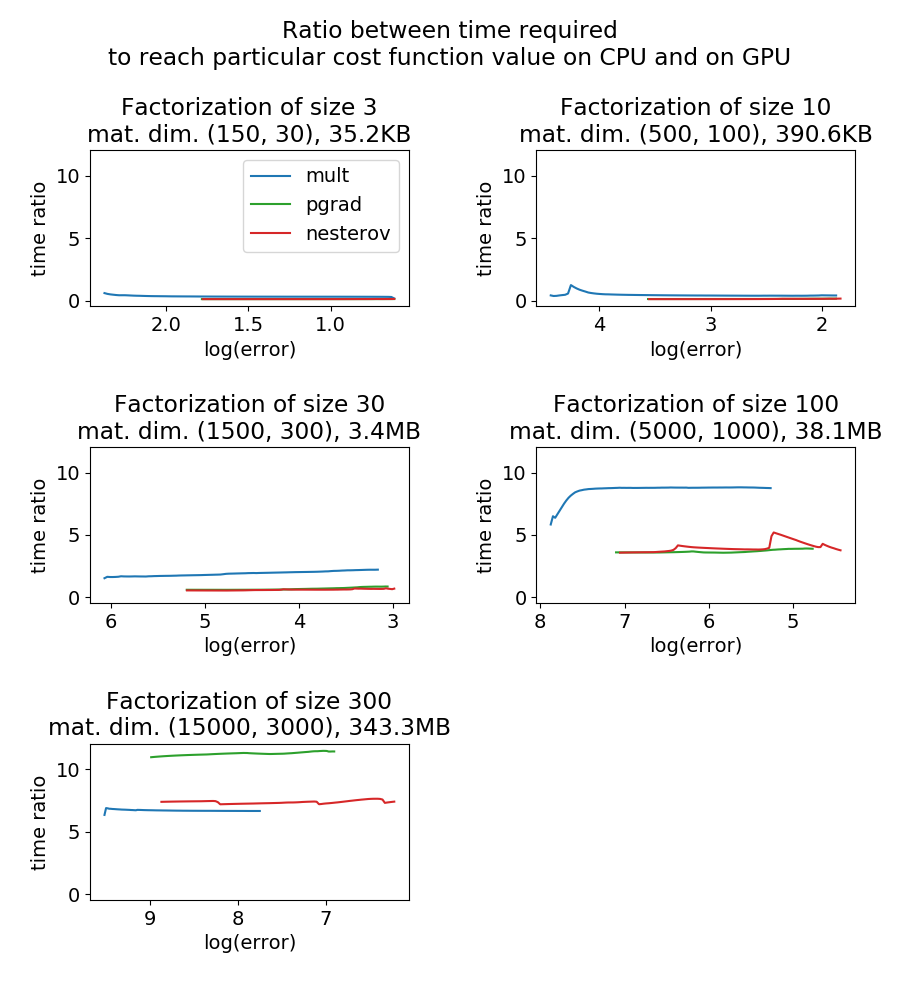

<IPython.core.display.Javascript object>


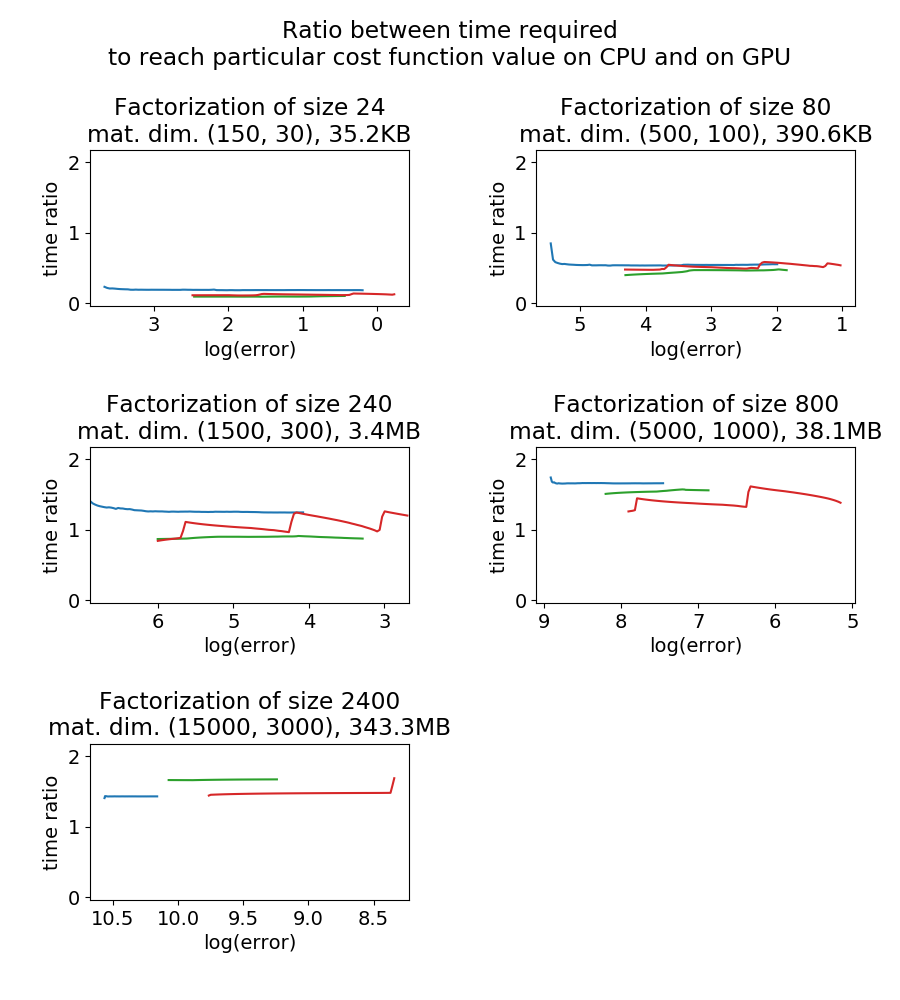

AxesSubplot(0.1,0.69375;0.354167x0.15625)
AxesSubplot(0.1,0.69375;0.354167x0.15625)
AxesSubplot(0.595833,0.69375;0.354167x0.15625)
AxesSubplot(0.595833,0.69375;0.354167x0.15625)
AxesSubplot(0.1,0.396875;0.354167x0.15625)
AxesSubplot(0.1,0.396875;0.354167x0.15625)
AxesSubplot(0.595833,0.396875;0.354167x0.15625)
AxesSubplot(0.595833,0.396875;0.354167x0.15625)
AxesSubplot(0.1,0.1;0.354167x0.15625)
AxesSubplot(0.1,0.1;0.354167x0.15625)


In [15]:
plt.close("all")


f, axes1 = plt.subplots(3, 2, figsize=figsize, dpi=100, 
                       gridspec_kw=gridspec_kw)
f.suptitle("Ratio between time required\nto reach particular cost function value on CPU and on GPU")

f, axes2 = plt.subplots(3, 2, figsize=figsize, dpi=100, 
                       gridspec_kw=gridspec_kw)
f.suptitle("Ratio between time required\nto reach particular cost function value on CPU and on GPU")

axes1[0,0].get_shared_y_axes().join(*axes1[0, :], *axes1[1, :],  *axes1[2, :])
axes2[0,0].get_shared_y_axes().join(*axes2[0, :], *axes2[1, :],  *axes2[2, :])

axes1[2,1].set_axis_off()
axes2[2,1].set_axis_off()

axes1 = list(axes1.ravel()) 
axes2 = list(axes2.ravel())


legend_is = False
for k, a in zip(keys, chain.from_iterable(zip(axes1, axes2))):
    print(a)
    r, shape = k
    plot_ratios_cpu_gpu(errors_dict[k], a)
    
    M = np.random.rand(shape[0], r) @ np.random.rand(r, shape[1])
    kb = M.nbytes / 2**10 
    mb = M.nbytes / 2**20
    
    if mb < 1:
        size = "{:.1f}KB".format(kb)  
    else:
        size = "{:.1f}MB".format(mb)  
        
    a.set_title("Factorization of size {}\nmat. dim. {}, {}".format(k[0], k[1], size))
    
    if legend_is:
        a.get_legend().remove()
    else:
        legend_is = True

<IPython.core.display.Javascript object>


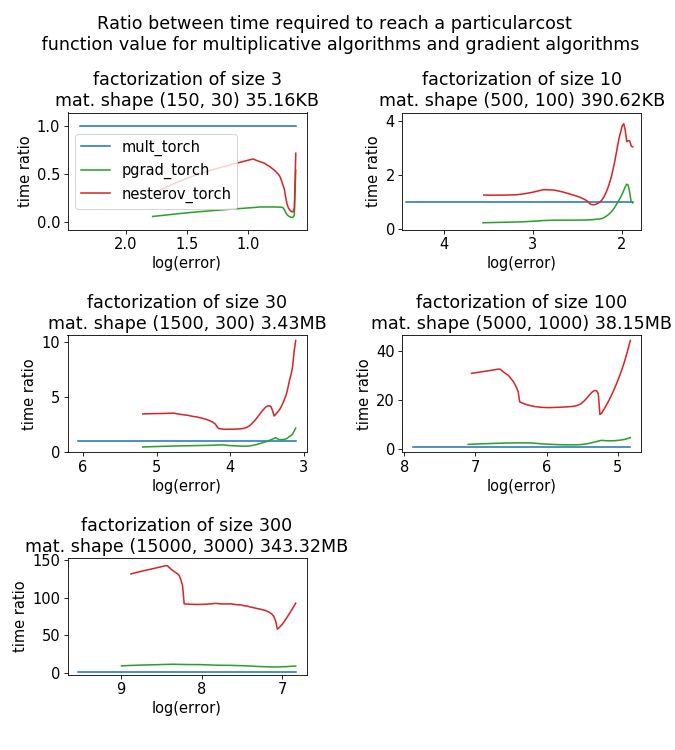

<IPython.core.display.Javascript object>


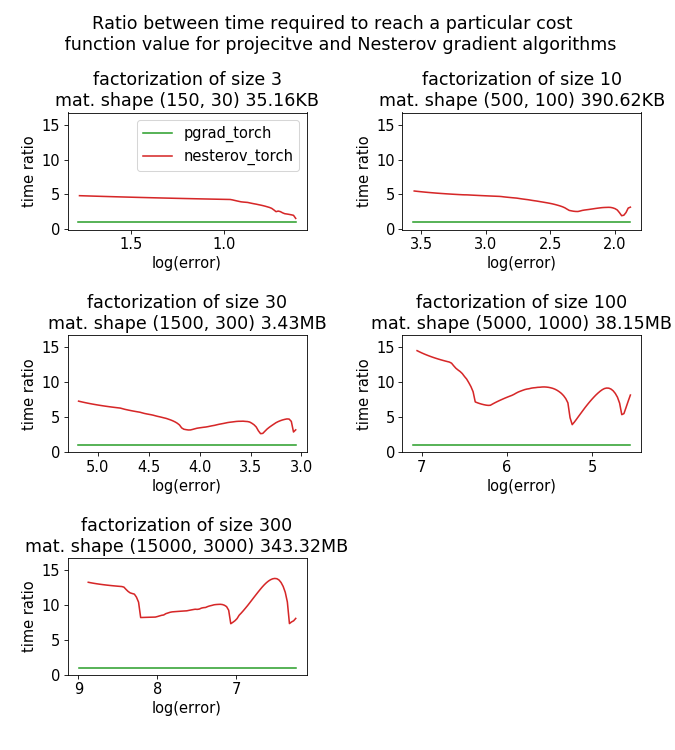

[(3, (150, 30)), (24, (150, 30)), (10, (500, 100)), (80, (500, 100)), (30, (1500, 300)), (240, (1500, 300)), (100, (5000, 1000)), (800, (5000, 1000)), (300, (15000, 3000)), (2400, (15000, 3000))]
6
6


In [55]:
plt.close("all")

f, axes1 = plt.subplots(3, 2, figsize=figsize, dpi=100, 
                       gridspec_kw=gridspec_kw)

f.suptitle("Ratio between time required to reach a particular"+
           "cost \n function value for multiplicative algorithms and gradient algorithms")


f, axes2 = plt.subplots(3, 2, figsize=figsize, dpi=100, 
                       gridspec_kw=gridspec_kw)


f.suptitle("Ratio between time required to reach a particular cost  \n function value for projecitve and Nesterov gradient algorithms")


axes1 = list(axes1.ravel())
axes2 = list(axes2.ravel())

axes1[-1].set_axis_off()
axes2[-1].set_axis_off()


# axes1[0].get_shared_y_axes().join(*axes1)
axes2[0].get_shared_y_axes().join(*axes2)

print(keys)
print(len(axes1))
print(len(axes2))

legend_is = False
for k, a1, a2 in zip(keys[::2], axes1, axes2):
    r, shape = k
    
    if r != 0.1 * shape[1]:
        print(k)
        continue
    
    plot_ratios_gpu_algo(errors_dict[k], [a1, a2],
                         selected_algs=["mult_torch", 
                                        "pgrad_torch",
                                        "nesterov_torch"])
    
    M = np.random.rand(shape[0], r) @ np.random.rand(r, shape[1])
    kb = M.nbytes / 2**10 
    mb = M.nbytes / 2**20
    
    if mb < 1:
        size = "{:.2f}KB".format(kb)  
    else:
        size = "{:.2f}MB".format(mb)  
        
    a1.set_title("factorization of size {}\nmat. shape {} {}".format(k[0], k[1], size))
    a2.set_title("factorization of size {}\nmat. shape {} {}".format(k[0], k[1], size))
    
    if legend_is:
        a1.get_legend().remove()
        a2.get_legend().remove()
    else:
        legend_is = True